In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family']='NanumGothic'

In [2]:
import pandas as pd

cooking = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project2/Cooking_data_set.csv')
error = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project2/Error_Message.csv')
booking = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project2/booking_data.csv', low_memory=False)
product = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project2/Product_Name.csv', low_memory=False)

# 데이터 전처리

## product/cooking 품목코드 앞자리 통일

In [4]:
# 필요한 컬럼만 서브셋
product_c = product[['품목코드','품목명']].copy()
product_c.dropna(subset=['품목코드'], inplace=True)
cooking_c = cooking.copy()
cooking_c.dropna(subset=['품목코드'], inplace=True)

In [5]:
# 품목코드에 특수문자 있는 데이터 삭제
product_c = product_c[product_c['품목코드'].str.isalnum()]
cooking_c = cooking_c[cooking_c['품목코드'].str.isalnum()]

In [6]:
# 앞자리 1로 통일
product_c['품목코드_통일'] = product['품목코드'].str.slice(start=1)
product_c['품목코드_통일'] = '1'+product_c['품목코드_통일']

cooking_c['품목코드_통일'] = cooking_c['품목코드'].str.slice(start=1)
cooking_c['품목코드_통일'] = '1'+cooking_c['품목코드_통일']

In [7]:
# 품목명에 결측치 있는 행 제거
product_c.dropna(subset=['품목명'], inplace=True)
cooking_c.dropna(subset=['품목명'], inplace=True)

In [8]:
# 인덱스 정리
product_c.reset_index(inplace=True)
cooking_c.reset_index(inplace=True)

In [9]:
# 컬럼 정리
product_c.drop('index', axis=1, inplace=True)
cooking_c.drop('index', axis=1, inplace=True)

## 2019년도 이후 데이터만 추출

In [10]:
booking_c = booking.copy()

In [11]:
# 결측치 제거
booking_c.dropna(subset=['수주일자'], inplace=True)

In [12]:
# 수주일자 문자열로 형변환
booking_c['수주일자'] = booking_c['수주일자'].astype('str')

In [13]:
# booking의 2019년도 데이터
booking_c = booking_c[booking_c['수주일자'].str.slice(start=0, stop=4).apply(lambda x: int(x)) > 2018].copy()

In [14]:
# 결측치 제거
cooking_c.dropna(subset=['생산일자'], inplace=True)

In [15]:
# cooking_c 2019년도 데이터
cooking_c = cooking_c[cooking_c['생산일자'].str.slice(start=0, stop=4).apply(lambda x: int(x)) > 2018].copy()

## booking과 product 머지

In [17]:
booking_c.head(3)

,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,수주단위,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,기준단가,생산지시,수주수량
298,60.0,20200521,115,SI0107,NaN,1BA03255,EA,0.0,54.0,1450.0,237273.0,23727,Y,20200522,1450.0,N,180.0
299,60.0,20200521,116,SI0107,NaN,16A02023,EA,0.0,50.0,3550.0,161364.0,16136,Y,20200522,3550.0,N,50.0
300,60.0,20200521,117,IJ9449,NaN,13K02080,EA,0.0,48.0,7040.0,153600.0,15360,Y,20200522,7040.0,N,24.0


In [18]:
# 필요한 컬럼만 뽑아서 booking 서브셋 생성
booking_c = booking_c[['수주부서','수주일자','수주품목코드','출고수량KG', '수주수량KG', '출하완료여부', '생산지시','납기일자']].copy()

In [19]:
# product 와 booking 머지
product_booking = product_c.merge(booking_c, how='inner', left_on='품목코드_통일', right_on='수주품목코드')
product_booking

,품목코드,품목명,품목코드_통일,수주부서,수주일자,수주품목코드,출고수량KG,수주수량KG,출하완료여부,생산지시,납기일자
0,11501135,한식베이스소스2kg,11501135,400,20200525,11501135,600.0,600.0,Y,NaN,20200602
1,11501135,한식베이스소스2kg,11501135,400,20210406,11501135,600.0,600.0,Y,NaN,20210426
2,11501135,한식베이스소스2kg,11501135,400,20201229,11501135,600.0,600.0,Y,NaN,20210107
3,11501135,한식베이스소스2kg,11501135,400,20210108,11501135,204.0,204.0,Y,NaN,20210113
4,11501135,한식베이스소스2kg,11501135,400,20190221,11501135,48.0,48.0,Y,NaN,20190225
...,...,...,...,...,...,...,...,...,...,...,...
659548,2BA02030,양송이포테이토크림생수프(재),1BA02030,400,20191030,1BA02030,135.2,135.2,Y,NaN,20191101
659549,2BA02030,양송이포테이토크림생수프(재),1BA02030,400,20191130,1BA02030,135.2,135.2,Y,N,20191201
659550,2BA02030,양송이포테이토크림생수프(재),1BA02030,400,20191231,1BA02030,135.2,135.2,Y,N,20200101
659551,2BA02030,양송이포테이토크림생수프(재),1BA02030,400,20200131,1BA02030,135.2,135.2,Y,N,20200201


In [20]:
# 결측치 제거
product_booking.dropna(subset=['품목코드_통일','수주수량KG'], inplace=True)

In [21]:
# 컬럼 제거
product_booking.drop('수주품목코드',axis=1,inplace=True)

In [23]:
cooking_c.head(3)

,순번,생산라인코드,생산라인명,생산일자,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,품목코드_통일
17348,5,C002,쿠커 #2,2019-01-02,23S09018,스파이시토마토소스(2kg)(재),W003,71.685976,86.485976,121.940226,23.636,207.147,78.20,13S09018
17349,10,C002,쿠커 #2,2019-01-03,23D04125,카츠젠사우전아일랜드드레싱2kg(재),W003,71.580858,90.380858,125.907658,23.685,206.920,74.47,13D04125
17350,8,C088,냉동밥 취반#1,2019-01-02,2BA03389,게살볶음밥E(재),W003,71.025150,93.125150,128.471600,23.564,214.286,71.74,1BA03389


In [24]:
# 필요한 컬럼만 뽑아서 cooking 서브셋 생성
cooking_c = cooking_c[['생산라인코드','생산일자','품목코드_통일', '작업장코드','충전실온도','실링온도','쿠킹온도','쿠킹스팀압력','실링압력' ,'생산시간']]

In [25]:
# product_booking 와 cooking 머지
product_booking_cooking = product_booking.merge(cooking_c, how='inner', left_on='품목코드_통일' , right_on='품목코드_통일')

In [26]:
# 결측치 제거
product_booking_cooking.dropna(subset=['품목코드_통일','수주수량KG'], inplace=True)

In [29]:
product_booking_cooking.drop('품목코드', axis=1, inplace=True)

In [30]:
product_booking_cooking

,품목명,품목코드_통일,수주부서,수주일자,출고수량KG,수주수량KG,출하완료여부,생산지시,납기일자,생산라인코드,생산일자,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간
0,한식베이스소스2kg,11501135,400,20200525,600.0,600.0,Y,NaN,20200602,C002,2020-11-30,W003,71.332471,91.932471,127.570321,23.759,207.166,74.72
1,한식베이스소스2kg,11501135,400,20210406,600.0,600.0,Y,NaN,20210426,C002,2020-11-30,W003,71.332471,91.932471,127.570321,23.759,207.166,74.72
2,한식베이스소스2kg,11501135,400,20201229,600.0,600.0,Y,NaN,20210107,C002,2020-11-30,W003,71.332471,91.932471,127.570321,23.759,207.166,74.72
3,한식베이스소스2kg,11501135,400,20210108,204.0,204.0,Y,NaN,20210113,C002,2020-11-30,W003,71.332471,91.932471,127.570321,23.759,207.166,74.72
4,한식베이스소스2kg,11501135,400,20190221,48.0,48.0,Y,NaN,20190225,C002,2020-11-30,W003,71.332471,91.932471,127.570321,23.759,207.166,74.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7619534,양송이포테이토크림생수프(재),1BA02030,400,20191030,135.2,135.2,Y,NaN,20191101,C096,2019-04-27,W003,71.561184,97.261184,132.927884,23.778,211.763,73.26
7619535,양송이포테이토크림생수프(재),1BA02030,400,20191130,135.2,135.2,Y,N,20191201,C096,2019-04-27,W003,71.561184,97.261184,132.927884,23.778,211.763,73.26
7619536,양송이포테이토크림생수프(재),1BA02030,400,20191231,135.2,135.2,Y,N,20200101,C096,2019-04-27,W003,71.561184,97.261184,132.927884,23.778,211.763,73.26
7619537,양송이포테이토크림생수프(재),1BA02030,400,20200131,135.2,135.2,Y,N,20200201,C096,2019-04-27,W003,71.561184,97.261184,132.927884,23.778,211.763,73.26


## 전체 데이터 이상치 제거

In [31]:
# 품목 코드 리스트
code_list = product_booking_cooking['품목코드_통일'].unique()
len(code_list)

777

In [32]:
# product_booking_cooking 이상치 삭제 함수
def no_ideal(x):
    df=product_booking_cooking[product_booking_cooking['품목코드_통일']==str(x)]
    q =df.quantile([.25,.75])
    q1 = q.iloc[0,2]
    q2 = q.iloc[1,2]
    i = q2-q1
    i1 = q1 - 1.5*i
    i2 = q2 + 1.5*i 
    df = df[(df['수주수량KG']>i1) & (df['수주수량KG']<i2)]
    return df

In [33]:
# 코드 리스트에 함수 적용 - product_booking_cooking 이상치 삭제
import time
from tqdm import tqdm

product_booking_cooking_no_ideal = pd.DataFrame()
for c in tqdm(code_list):
    product_booking_cooking_no_ideal = pd.concat([product_booking_cooking_no_ideal,no_ideal(c)])

100%|██████████| 777/777 [07:59<00:00,  1.62it/s]


In [34]:
len(product_booking_cooking_no_ideal)

93982

In [35]:
# csv로 저장
product_booking_cooking_no_ideal.to_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project2/product_booking_cooking_no_ideal.csv')

In [ ]:
# 불러오는 코드
import pandas as pd
product_booking_cooking_no_ideal = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/알파코/파이썬 프로젝트/Project2/product_booking_cooking_no_ideal.csv',low_memory=False)


In [ ]:
# 불러왔을 때 컬럼 정리
product_booking_cooking_no_ideal.drop('Unnamed: 0', axis=1, inplace=True)

# 상관분석

In [39]:
def replace_num(x):
    if x == 'Y':
        return 1
    else:
        return 0

In [40]:
# 출하여부 수치형으로 변경
product_booking_cooking_no_ideal['출하완료여부_num'] = product_booking_cooking_no_ideal['출하완료여부'].apply(lambda x: replace_num(x))

In [42]:
product_booking_cooking_no_ideal.corr(method='pearson')

,출고수량KG,수주수량KG,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,출하완료여부_num
출고수량KG,1.000000,0.076562,0.012123,0.001429,0.001116,-0.009627,0.000014,0.011602,0.006675
수주수량KG,0.076562,1.000000,0.069070,-0.025309,-0.023417,0.057855,0.024133,0.036679,-0.013153
충전실온도,0.012123,0.069070,1.000000,-0.044037,-0.033521,0.324800,0.298725,0.110711,-0.000507
실링온도,0.001429,-0.025309,-0.044037,1.000000,0.999481,0.018181,-0.074218,0.011438,0.006179
쿠킹온도,0.001116,-0.023417,-0.033521,0.999481,1.000000,0.050394,-0.053620,0.018705,0.006119
쿠킹스팀압력,-0.009627,0.057855,0.324800,0.018181,0.050394,1.000000,0.636508,0.257089,-0.001647
실링압력,0.000014,0.024133,0.298725,-0.074218,-0.053620,0.636508,1.000000,0.101920,0.000793
생산시간,0.011602,0.036679,0.110711,0.011438,0.018705,0.257089,0.101920,1.000000,-0.004949
출하완료여부_num,0.006675,-0.013153,-0.000507,0.006179,0.006119,-0.001647,0.000793,-0.004949,1.000000


In [166]:
product_booking_cooking_no_ideal_y = product_booking_cooking_no_ideal[product_booking_cooking_no_ideal['출하완료여부_num']==1]
product_booking_cooking_no_ideal_y.corr(method='pearson')

,출고수량KG,수주수량KG,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,출하완료여부_num
출고수량KG,1.000000,0.078085,0.011784,0.001526,0.001212,-0.009680,-0.000080,0.011878,NaN
수주수량KG,0.078085,1.000000,0.068903,-0.025038,-0.023155,0.057637,0.023913,0.036460,NaN
충전실온도,0.011784,0.068903,1.000000,-0.043957,-0.033452,0.324497,0.298465,0.110932,NaN
실링온도,0.001526,-0.025038,-0.043957,1.000000,0.999481,0.018149,-0.074191,0.011687,NaN
쿠킹온도,0.001212,-0.023155,-0.033452,0.999481,1.000000,0.050357,-0.053599,0.018951,NaN
쿠킹스팀압력,-0.009680,0.057637,0.324497,0.018149,0.050357,1.000000,0.636417,0.257042,NaN
실링압력,-0.000080,0.023913,0.298465,-0.074191,-0.053599,0.636417,1.000000,0.101871,NaN
생산시간,0.011878,0.036460,0.110932,0.011687,0.018951,0.257042,0.101871,1.000000,NaN
출하완료여부_num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
product_booking_cooking_no_ideal_y.isnull().sum()

품목명               0
품목코드_통일           0
수주부서          15386
수주일자              0
출고수량KG            0
수주수량KG            0
출하완료여부            0
생산지시           3640
납기일자              0
생산라인코드            0
생산일자              0
작업장코드             0
충전실온도             0
실링온도              0
쿠킹온도              0
쿠킹스팀압력            0
실링압력              0
생산시간           3864
출하완료여부_num        0
dtype: int64

In [165]:
product_booking_cooking_no_ideal_n = product_booking_cooking_no_ideal[product_booking_cooking_no_ideal['출하완료여부_num']==0]

In [175]:
product_booking_cooking_no_ideal_n.corr(method='pearson')

,수주일자,출고수량KG,수주수량KG,납기일자,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,출하완료여부_num,일자차이
수주일자,1.000000,-0.115635,0.306535,1.000000,0.163269,-0.026819,-0.023047,0.109271,0.022805,0.112089,NaN,-0.243095
출고수량KG,-0.115635,1.000000,-0.480043,-0.115668,0.099331,-0.042362,-0.041971,0.009345,0.026044,-0.053149,NaN,-0.181806
수주수량KG,0.306535,-0.480043,1.000000,0.306509,0.139488,-0.116864,-0.111534,0.150343,0.127124,0.103503,NaN,-0.241580
납기일자,1.000000,-0.115668,0.306509,1.000000,0.163269,-0.026815,-0.023043,0.109265,0.022794,0.112092,NaN,-0.242951
충전실온도,0.163269,0.099331,0.139488,0.163269,1.000000,-0.069039,-0.054722,0.416195,0.375008,0.051219,NaN,-0.040286
실링온도,-0.026819,-0.042362,-0.116864,-0.026815,-0.069039,1.000000,0.999419,0.033531,-0.086185,-0.058283,NaN,0.033968
쿠킹온도,-0.023047,-0.041971,-0.111534,-0.023043,-0.054722,0.999419,1.000000,0.067588,-0.063267,-0.050411,NaN,0.031548
쿠킹스팀압력,0.109271,0.009345,0.150343,0.109265,0.416195,0.033531,0.067588,1.000000,0.667516,0.272141,NaN,-0.069296
실링압력,0.022805,0.026044,0.127124,0.022794,0.375008,-0.086185,-0.063267,0.667516,1.000000,0.118401,NaN,-0.075252
생산시간,0.112089,-0.053149,0.103503,0.112092,0.051219,-0.058283,-0.050411,0.272141,0.118401,1.000000,NaN,-0.011068


In [47]:
product_booking_cooking_no_ideal_y.corrwith(other=product_booking_cooking_no_ideal_n, method='pearson')

출고수량KG       NaN
수주수량KG       NaN
충전실온도        NaN
실링온도         NaN
쿠킹온도         NaN
쿠킹스팀압력       NaN
실링압력         NaN
생산시간         NaN
출하완료여부_num   NaN
dtype: float64

In [168]:
product_booking_cooking_no_ideal_y['납기일자'] =product_booking_cooking_no_ideal_y['납기일자'].astype('int64')
product_booking_cooking_no_ideal_y['수주일자']= product_booking_cooking_no_ideal_y['수주일자'].astype('int64')

In [ ]:
product_booking_cooking_no_ideal_y['일자차이'] = product_booking_cooking_no_ideal_y['납기일자'] - product_booking_cooking_no_ideal_y['수주일자']
product_booking_cooking_no_ideal_y

In [170]:
product_booking_cooking_no_ideal_n['납기일자'] =product_booking_cooking_no_ideal_n['납기일자'].astype('int64')
product_booking_cooking_no_ideal_n['수주일자']= product_booking_cooking_no_ideal_n['수주일자'].astype('int64')
product_booking_cooking_no_ideal_n['일자차이'] = product_booking_cooking_no_ideal_n['납기일자'] - product_booking_cooking_no_ideal_n['수주일자']

In [174]:
product_booking_cooking_no_ideal_y.groupby('일자차이').count()

,품목명,품목코드_통일,수주부서,수주일자,출고수량KG,수주수량KG,출하완료여부,생산지시,납기일자,생산라인코드,생산일자,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,출하완료여부_num,수주일자_년월
일자차이,,,,,,,,,,,,,,,,,,,,
-106,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
-76,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
-75,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,6,6
-73,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
-72,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
-71,217,217,201,217,217,217,217,217,217,217,217,217,217,217,217,217,217,205,217,217
-70,39,39,11,39,39,39,39,39,39,39,39,39,39,39,39,39,39,38,39,39
-22,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
-21,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,14,15,15


In [ ]:
index1= product_booking_cooking_no_ideal_y[(product_booking_cooking_no_ideal_y['일자차이'] >2) | (product_booking_cooking_no_ideal_y['일자차이'] < 0)].index
index2= product_booking_cooking_no_ideal_n[(product_booking_cooking_no_ideal_n['일자차이'] >2) | (product_booking_cooking_no_ideal_n['일자차이'] < 0)].index

In [90]:
index1= product_booking_cooking_no_ideal_y[(product_booking_cooking_no_ideal_y['일자차이'] >2) | (product_booking_cooking_no_ideal_y['일자차이'] < 0)].index
index2= product_booking_cooking_no_ideal_n[(product_booking_cooking_no_ideal_n['일자차이'] >2) | (product_booking_cooking_no_ideal_n['일자차이'] < 0)].index

In [91]:
product_booking_cooking_no_ideal_y.drop(index1, inplace=True)
product_booking_cooking_no_ideal_n.drop(index2, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [92]:
product_booking_cooking_no_ideal_y.describe()

,수주일자,출고수량KG,수주수량KG,납기일자,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,출하완료여부_num,일자차이
count,7.708900e+04,77089.000000,77089.000000,7.708900e+04,77089.000000,77089.000000,77089.000000,77089.000000,77089.000000,73798.000000,77089.0,77089.000000
mean,2.019970e+07,60.818942,71.206997,2.019970e+07,71.711325,101.937722,137.497448,23.706494,208.438483,75.551303,1.0,0.711697
std,8.158086e+03,25.909973,1.241370,8.158049e+03,0.903829,12.745954,12.760752,0.275994,3.780980,2.652015,0.0,0.503973
min,2.019010e+07,0.000000,66.150000,2.019010e+07,68.440440,65.097533,100.106183,22.715000,194.405000,69.690000,1.0,0.000000
25%,2.019072e+07,70.000000,70.000000,2.019072e+07,71.126077,91.878034,127.528090,23.541000,205.884000,73.420000,1.0,0.000000
50%,2.020051e+07,70.950000,71.100000,2.020051e+07,71.771716,99.733547,135.187697,23.716000,208.371000,75.280000,1.0,1.000000
75%,2.021021e+07,72.000000,72.000000,2.021021e+07,72.378897,110.724088,146.471108,23.889000,211.335000,77.690000,1.0,1.000000
max,2.021110e+07,170.000000,76.600000,2.021110e+07,74.049005,140.603359,176.467517,24.580000,220.835000,81.430000,1.0,2.000000


In [93]:
product_booking_cooking_no_ideal_n.describe()

,수주일자,출고수량KG,수주수량KG,납기일자,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,출하완료여부_num,일자차이
count,2.990000e+02,299.000000,299.000000,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,286.000000,299.0,299.000000
mean,2.020404e+07,58.167893,71.498328,2.020404e+07,71.708543,100.238309,135.805729,23.711612,208.344599,75.814301,0.0,0.525084
std,4.893469e+03,27.673144,0.923448,4.893343e+03,1.006874,11.227209,11.250453,0.258336,3.642447,2.867962,0.0,0.500208
min,2.020050e+07,0.000000,69.600000,2.020050e+07,69.093469,72.706464,108.251314,22.884000,198.255000,70.260000,0.0,0.000000
25%,2.020062e+07,70.000000,70.950000,2.020062e+07,71.112142,92.484565,128.278565,23.581000,206.074000,73.360000,0.0,0.000000
50%,2.020062e+07,71.000000,71.100000,2.020062e+07,71.705995,98.567506,133.911239,23.699000,208.543000,75.670000,0.0,1.000000
75%,2.021102e+07,72.000000,72.000000,2.021102e+07,72.436287,108.351933,144.162686,23.883000,211.635000,77.825000,0.0,1.000000
max,2.021110e+07,72.600000,73.290000,2.021110e+07,73.906166,137.536685,173.316285,24.384000,216.448000,81.380000,0.0,1.000000


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


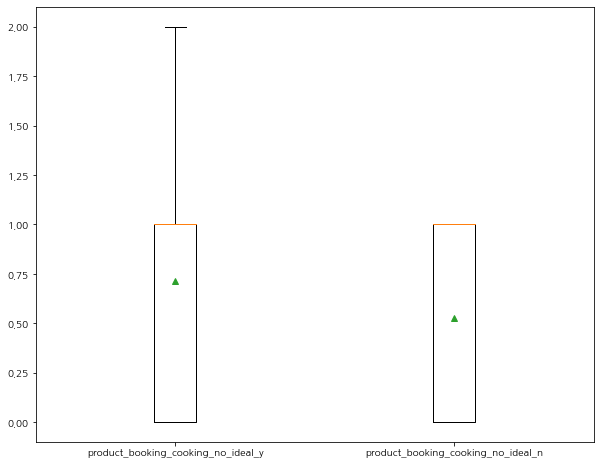

In [95]:
plt.figure(figsize=(10,8))
plt.boxplot([product_booking_cooking_no_ideal_y['일자차이'], product_booking_cooking_no_ideal_n['일자차이']], 
            labels=['product_booking_cooking_no_ideal_y','product_booking_cooking_no_ideal_n'],
            showmeans=True)
plt.show()

In [63]:
product_booking_cooking_no_ideal_n['납기일자'] =product_booking_cooking_no_ideal_n['납기일자'].astype('int64')
product_booking_cooking_no_ideal_n['수주일자']= product_booking_cooking_no_ideal_n['수주일자'].astype('int64')

<ipython-input-63-c089308ccea7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_booking_cooking_no_ideal_n['납기일자'] =product_booking_cooking_no_ideal_n['납기일자'].astype('int64')
<ipython-input-63-c089308ccea7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_booking_cooking_no_ideal_n['수주일자']= product_booking_cooking_no_ideal_n['수주일자'].astype('int64')


In [ ]:
product_booking_cooking_no_ideal_n['일자차이'] = product_booking_cooking_no_ideal_n['납기일자'] - product_booking_cooking_no_ideal_n['수주일자']
product_booking_cooking_no_ideal_n

In [65]:
product_booking_cooking_no_ideal_n.describe()

,수주일자,출고수량KG,수주수량KG,납기일자,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,출하완료여부_num,일자차이
count,3.120000e+02,312.000000,312.000000,3.120000e+02,312.000000,312.000000,312.000000,312.000000,312.000000,299.000000,312.0,312.00000
mean,2.020400e+07,57.341250,71.500865,2.020400e+07,71.712767,100.511485,136.084555,23.715381,208.378657,75.794482,0.0,0.50641
std,4.875812e+03,28.323047,0.908026,4.875630e+03,1.002705,11.327702,11.347282,0.258155,3.643908,2.850592,0.0,0.74796
min,2.020050e+07,0.000000,69.600000,2.020050e+07,69.093469,72.706464,108.251314,22.884000,198.255000,70.260000,0.0,-3.00000
25%,2.020062e+07,70.000000,70.987500,2.020062e+07,71.113281,92.554475,128.278565,23.581000,206.074000,73.360000,0.0,0.00000
50%,2.020062e+07,71.000000,71.100000,2.020062e+07,71.706563,98.656539,134.156248,23.711000,208.543000,75.670000,0.0,1.00000
75%,2.021102e+07,72.000000,72.000000,2.021102e+07,72.436287,108.545539,144.266863,23.887000,211.635000,77.690000,0.0,1.00000
max,2.021110e+07,72.600000,73.290000,2.021110e+07,73.906166,137.536685,173.316285,24.384000,216.448000,81.380000,0.0,3.00000


In [56]:
subset = product_booking_cooking_no_ideal_n.groupby("수주부서").count()
subset

,품목명,품목코드_통일,수주일자,출고수량KG,수주수량KG,출하완료여부,생산지시,납기일자,생산라인코드,생산일자,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,출하완료여부_num
수주부서,,,,,,,,,,,,,,,,,,
202,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,209,200,209
400,97,97,97,97,97,97,68,97,97,97,97,97,97,97,97,97,93,97
900,6,6,6,6,6,6,0,6,6,6,6,6,6,6,6,6,6,6


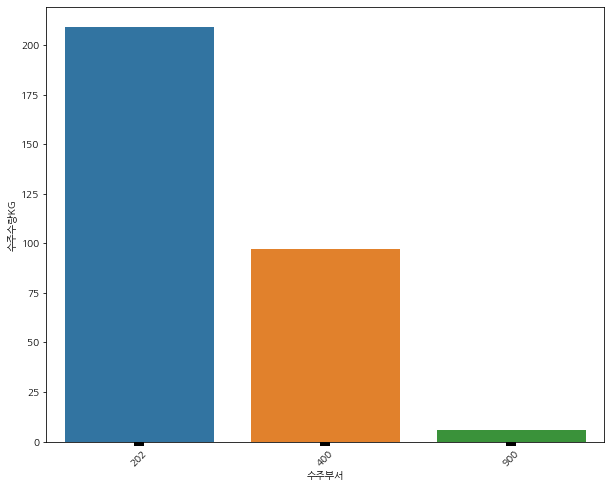

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
x=subset.index
y=subset['수주수량KG']
sns.barplot(x=x, y=y)
plt.tick_params(axis='x', width=10)
plt.xticks(rotation=45)
plt.show()

In [104]:
subset1 = product_booking_cooking_no_ideal_n.groupby("작업장코드").count()
subset1

,품목명,품목코드_통일,수주부서,수주일자,출고수량KG,수주수량KG,출하완료여부,생산지시,납기일자,생산라인코드,생산일자,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,출하완료여부_num,일자차이
작업장코드,,,,,,,,,,,,,,,,,,,
W003,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,56,62,62
W005,143,143,143,143,143,143,143,114,143,143,143,143,143,143,143,143,142,143,143
W007,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,88,94,94


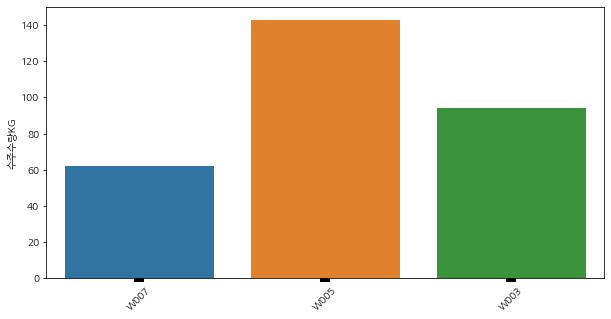

In [105]:
plt.figure(figsize=(10,5))
x=product_booking_cooking_no_ideal_n['작업장코드'].unique()
y=subset1['수주수량KG']
sns.barplot(x=x, y=y)
plt.tick_params(axis='x', width=10)
plt.xticks(rotation=45)
plt.show()

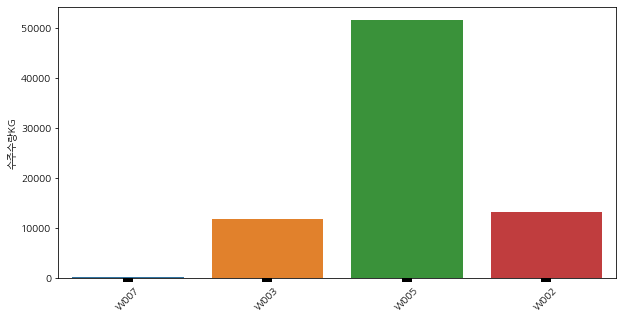

In [102]:
plt.figure(figsize=(10,5))
x=product_booking_cooking_no_ideal_y['작업장코드'].unique()
y=subset['수주수량KG']
sns.barplot(x=x, y=y)
plt.tick_params(axis='x', width=10)
plt.xticks(rotation=45)
plt.show()

In [100]:
subset = product_booking_cooking_no_ideal_y.groupby("작업장코드").count()
subset

,품목명,품목코드_통일,수주부서,수주일자,출고수량KG,수주수량KG,출하완료여부,생산지시,납기일자,생산라인코드,생산일자,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,출하완료여부_num,일자차이
작업장코드,,,,,,,,,,,,,,,,,,,
W002,298,298,296,298,298,298,298,298,298,298,298,298,298,298,298,298,296,298,298
W003,11834,11834,10248,11834,11834,11834,11834,11458,11834,11834,11834,11834,11834,11834,11834,11834,11358,11834,11834
W005,51666,51666,42614,51666,51666,51666,51666,49270,51666,51666,51666,51666,51666,51666,51666,51666,49482,51666,51666
W007,13291,13291,11947,13291,13291,13291,13291,13128,13291,13291,13291,13291,13291,13291,13291,13291,12662,13291,13291


In [108]:
product_booking_cooking_no_ideal.head(1)

,품목명,품목코드_통일,수주부서,수주일자,출고수량KG,수주수량KG,출하완료여부,생산지시,납기일자,생산라인코드,생산일자,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,출하완료여부_num
338,시아스떡볶이양념소스,13A00010,NaN,20210405,72.0,72.0,Y,N,20210406,P002,2019-07-30,W007,71.486206,100.386206,136.084756,23.799,210.049,73.9,1


In [110]:
product_booking_cooking_no_ideal.dtypes

품목명            object
품목코드_통일        object
수주부서           object
수주일자           object
출고수량KG        float64
수주수량KG        float64
출하완료여부         object
생산지시           object
납기일자           object
생산라인코드         object
생산일자           object
작업장코드          object
충전실온도         float64
실링온도          float64
쿠킹온도          float64
쿠킹스팀압력        float64
실링압력          float64
생산시간          float64
출하완료여부_num      int64
dtype: object

In [112]:
product_booking_cooking_no_ideal['수주일자_년월'] = product_booking_cooking_no_ideal['수주일자'].apply(lambda x: x[:6])
product_booking_cooking_no_ideal

,품목명,품목코드_통일,수주부서,수주일자,출고수량KG,수주수량KG,출하완료여부,생산지시,납기일자,생산라인코드,생산일자,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,실링압력,생산시간,출하완료여부_num,수주일자_년월
338,시아스떡볶이양념소스,13A00010,NaN,20210405,72.00,72.00,Y,N,20210406,P002,2019-07-30,W007,71.486206,100.386206,136.084756,23.799,210.049,73.90,1,202104
339,시아스떡볶이양념소스,13A00010,NaN,20210405,72.00,72.00,Y,N,20210406,C001,2020-12-16,W003,72.575330,96.475330,132.404580,23.953,210.781,76.42,1,202104
930,시아스떡볶이양념소스,13A00010,sc600,20200331,0.00,72.00,Y,N,20200401,P002,2019-07-30,W007,71.486206,100.386206,136.084756,23.799,210.049,73.90,1,202003
931,시아스떡볶이양념소스,13A00010,sc600,20200331,0.00,72.00,Y,N,20200401,C001,2020-12-16,W003,72.575330,96.475330,132.404580,23.953,210.781,76.42,1,202003
1008,시아스떡볶이양념소스,13A00010,200,20190123,72.00,72.00,Y,N,20190124,P002,2019-07-30,W007,71.486206,100.386206,136.084756,23.799,210.049,73.90,1,201901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7617680,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20191230,71.55,71.55,Y,N,20191229,L001,2020-02-24,W002,71.579521,91.979521,127.749721,23.847,202.929,80.11,1,201912
7618477,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20210326,71.55,71.55,Y,N,20210326,C098,2019-11-28,W003,71.777769,103.477769,139.108819,23.754,212.910,76.88,1,202103
7618478,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20210326,71.55,71.55,Y,N,20210326,L001,2020-02-24,W002,71.579521,91.979521,127.749721,23.847,202.929,80.11,1,202103
7618705,슈퍼곡물귀리소고기죽(파우치)450g(재),1BA01045,202,20210802,72.00,72.00,Y,N,20210801,C098,2019-11-28,W003,71.777769,103.477769,139.108819,23.754,212.910,76.88,1,202108


## 제품군 나누기

In [117]:
product_booking_cooking_no_ideal_source = product_booking_cooking_no_ideal[product_booking_cooking_no_ideal['품목명'].str.contains('소스')]
product_booking_cooking_no_ideal_source_index = product_booking_cooking_no_ideal[product_booking_cooking_no_ideal['품목명'].str.contains('소스')].index
product_booking_cooking_no_ideal_no_source = product_booking_cooking_no_ideal.drop(product_booking_cooking_no_ideal_source_index).copy()

product_booking_cooking_no_ideal_bob = product_booking_cooking_no_ideal_no_source[(product_booking_cooking_no_ideal_no_source['품목명'].str.contains('밥'))]
product_booking_cooking_no_ideal_bob_index = product_booking_cooking_no_ideal_no_source[(product_booking_cooking_no_ideal_no_source['품목명'].str.contains('밥'))].index
product_booking_cooking_no_ideal_no_source_bob = product_booking_cooking_no_ideal_no_source.drop(product_booking_cooking_no_ideal_bob_index).copy()

product_booking_cooking_no_ideal_mayo = product_booking_cooking_no_ideal_no_source_bob[product_booking_cooking_no_ideal_no_source_bob['품목명'].str.contains('마요네즈')]
product_booking_cooking_no_ideal_mayo_index = product_booking_cooking_no_ideal_no_source_bob[product_booking_cooking_no_ideal_no_source_bob['품목명'].str.contains('마요네즈')].index
product_booking_cooking_no_ideal_no_source_bob_mayo = product_booking_cooking_no_ideal_no_source_bob.drop(product_booking_cooking_no_ideal_mayo_index).copy()


product_booking_cooking_no_ideal_dress= product_booking_cooking_no_ideal_no_source_bob_mayo[product_booking_cooking_no_ideal_no_source_bob_mayo['품목명'].str.contains('드레싱')]
product_booking_cooking_no_ideal_dress_index =  product_booking_cooking_no_ideal_no_source_bob_mayo[product_booking_cooking_no_ideal_no_source_bob_mayo['품목명'].str.contains('드레싱')].index
product_booking_cooking_no_ideal_no_source_bob_mayo_dress = product_booking_cooking_no_ideal_no_source_bob_mayo.drop(product_booking_cooking_no_ideal_dress_index).copy()

product_booking_cooking_no_ideal_salad= product_booking_cooking_no_ideal_no_source_bob_mayo_dress[product_booking_cooking_no_ideal_no_source_bob_mayo_dress['품목명'].str.contains('샐러드')]
product_booking_cooking_no_ideal_salad_index = product_booking_cooking_no_ideal_no_source_bob_mayo_dress[product_booking_cooking_no_ideal_no_source_bob_mayo_dress['품목명'].str.contains('샐러드')].index

product_booking_cooking_no_ideal_no_source_bob_mayo_dress_salad = product_booking_cooking_no_ideal_no_source_bob_mayo_dress.drop(product_booking_cooking_no_ideal_salad_index).copy()

In [124]:
source_yn = product_booking_cooking_no_ideal_source.groupby('출하완료여부')['품목명'].count()
bob_yn = product_booking_cooking_no_ideal_bob.groupby('출하완료여부')['품목명'].count()
mayo_yn = product_booking_cooking_no_ideal_mayo.groupby('출하완료여부')['품목명'].count()
dress_yn = product_booking_cooking_no_ideal_dress.groupby('출하완료여부')['품목명'].count()
salad_yn = product_booking_cooking_no_ideal_salad.groupby('출하완료여부')['품목명'].count()
ect_yn =  product_booking_cooking_no_ideal_no_source_bob_mayo_dress_salad.groupby('출하완료여부')['품목명'].count()

In [129]:
salad_yn.values

array([   86, 37547])

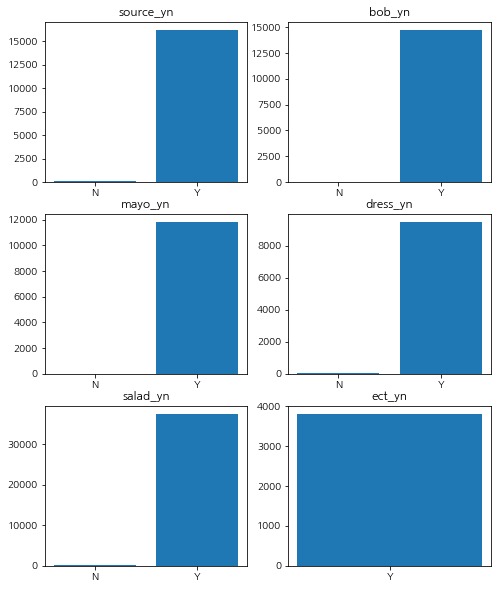

In [141]:
fig, ax = plt.subplots(3,2,figsize=(8,10))

ax[0][0].bar(source_yn.index ,source_yn.values)
ax[0][1].bar(bob_yn.index ,bob_yn.values)
ax[1][0].bar(mayo_yn.index ,mayo_yn.values)
ax[1][1].bar(dress_yn.index ,dress_yn.values)
ax[2][0].bar(salad_yn.index ,salad_yn.values)
ax[2][1].bar(ect_yn.index ,ect_yn.values)

ax[0][0].set_title('source_yn')
ax[0][1].set_title('bob_yn')
ax[1][0].set_title('mayo_yn')
ax[1][1].set_title('dress_yn')
ax[2][0].set_title('salad_yn')
ax[2][1].set_title('ect_yn')

plt.show()


(0.0, 40000.0)

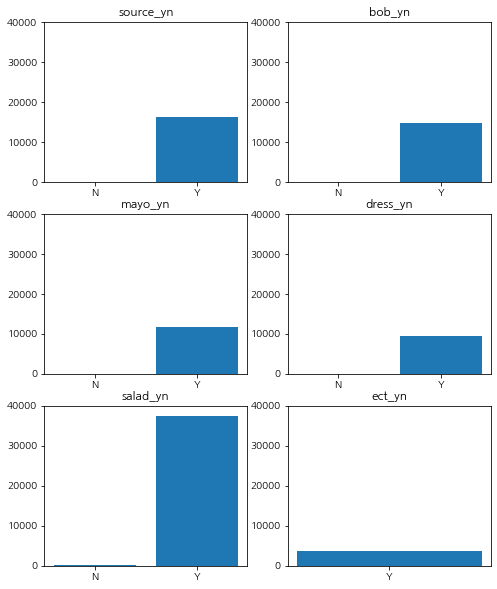

In [146]:
fig, ax = plt.subplots(3,2,figsize=(8,10))

ax[0][0].bar(source_yn.index ,source_yn.values)
ax[0][1].bar(bob_yn.index ,bob_yn.values)
ax[1][0].bar(mayo_yn.index ,mayo_yn.values)
ax[1][1].bar(dress_yn.index ,dress_yn.values)
ax[2][0].bar(salad_yn.index ,salad_yn.values)
ax[2][1].bar(ect_yn.index ,ect_yn.values)

ax[0][0].set_title('source_yn')
ax[0][1].set_title('bob_yn')
ax[1][0].set_title('mayo_yn')
ax[1][1].set_title('dress_yn')
ax[2][0].set_title('salad_yn')
ax[2][1].set_title('ect_yn')

ax[0][0].set_ylim([0,40000])
ax[0][1].set_ylim([0,40000])
ax[1][0].set_ylim([0,40000])
ax[1][1].set_ylim([0,40000])
ax[2][0].set_ylim([0,40000])
ax[2][1].set_ylim([0,40000])


In [176]:
product_booking_cooking_no_ideal_n_day_amount = product_booking_cooking_no_ideal_n[['일자차이','수주수량KG']]

In [177]:
product_booking_cooking_no_ideal_n_day_amount['일자차이'].nunique()

5

In [178]:
import numpy as np
from scipy import stats  #  과학용 계산 라이브러리
from sklearn.datasets import load_boston  #  사이킷런 데이타셋
from sklearn.model_selection import train_test_split 
# 트레인/테스트 데이터 나누기
from sklearn.linear_model import LinearRegression #  모델 학습
from sklearn.metrics import mean_squared_error #  에러 계산
import warnings
warnings.filterwarnings('ignore') # 경고무시

In [179]:
# 인풋, 타겟 설정
x=product_booking_cooking_no_ideal_n_day_amount.drop(['수주수량KG'], axis=1) # input
y=product_booking_cooking_no_ideal_n_day_amount['수주수량KG'] # target

In [180]:
# 트레인/ 테스트 구분
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [181]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [187]:
# 학습
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2)
clf.fit(x_train_sc, y_train)

ValueError: ignored

In [183]:
# 예측
y_predict = clf.predict(x_test_sc)
y_predict

array([71.03138817, 71.92213023, 71.03138817, 71.03138817, 71.03138817,
       71.03138817, 71.03138817, 71.92213023, 71.92213023, 71.03138817,
       71.92213023, 71.92213023, 71.03138817, 71.92213023, 71.03138817,
       71.92213023, 71.92213023, 71.03138817, 71.92213023, 71.03138817,
       71.03138817, 71.92213023, 71.92213023, 71.92213023, 71.92213023,
       71.03138817, 71.92213023, 71.92213023, 71.92213023, 71.03138817,
       71.03138817, 71.03138817, 71.92213023, 71.03138817, 71.97940427,
       71.92213023, 71.92213023, 71.92213023, 71.92213023, 71.92213023,
       71.92213023, 71.92213023, 71.92213023, 71.03138817, 71.03138817,
       71.03138817, 71.92213023, 71.92213023, 71.03138817, 71.92213023,
       71.92213023, 71.92213023, 71.03138817, 71.03138817, 71.92213023,
       71.92213023, 71.92213023, 71.03138817, 71.92213023, 71.03138817,
       71.03138817, 71.92213023, 71.92213023])

In [184]:
# train 정확도
clf.score(x_train, y_train)

-0.17557900887267341

In [185]:
# test 정확도
clf.score(x_test, y_test)

-0.6718253915744765